<a href="https://colab.research.google.com/github/Vishu26/Statistical-Communication-Labs/blob/master/Lab_6_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 

## <font color='red'> 1. Generating correlated random variables: In this experiment take 3 zero mean, unit variance, uncorrelated random Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ transformation so that $Y$ have specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity

Hint for Code: Use np.linalg.eig,np.diag,np.matmul,np.cov

In [11]:
no_samples = 1000
x1 = np.random.randn(no_samples)
x2 = np.random.randn(no_samples)
x3 = np.random.randn(no_samples)
X = np.concatenate((np.array([x1]),np.array([x2]),np.array([x3])),axis=0)
print(X.shape)
Cx = np.cov(X)
print("Cx=",Cx)
Cy = np.array([[1 , 0.8 ,0.5],
               [0.8 , 1 , 0.8],
              [0.5,0.8,1]])
print("Cy=",Cy)
#write code here
lamb, U = np.linalg.eig(Cy)
sigma = np.eye(3)
sigma[0,0] = lamb[0]
sigma[1,1] = lamb[1]
sigma[2,2] = lamb[2]
A = U.dot(sigma**0.5)
Yn = A.dot(X)
Cynew = np.cov(Yn) #write code here
print("Cy_new=",Cynew)



(3, 1000)
Cx= [[1.02804922 0.00793698 0.00322126]
 [0.00793698 0.9483927  0.01188437]
 [0.00322126 0.01188437 1.06487885]]
Cy= [[1.  0.8 0.5]
 [0.8 1.  0.8]
 [0.5 0.8 1. ]]
Cy_new= [[ 0.36818008  0.12185837 -1.2447782  ...  0.55825213 -1.24829052
   0.41100151]
 [ 0.12281545  0.06626025 -0.83974352 ...  0.20119827 -2.7095116
  -0.07261974]
 [ 0.42588967  0.38778633 -0.03860826 ...  0.26719057 -2.86362673
   0.01350207]]


array([[1.01325767, 0.8267655 , 0.5338606 ],
       [0.8267655 , 1.0315694 , 0.81625167],
       [0.5338606 , 0.81625167, 1.00285623]])

## <font color='red'> 2. Understand and implement PCA for image compression and recognition.<font> 
    Methodology: set of face images are to be used to generate basis matrix based on PCA, and the matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved.

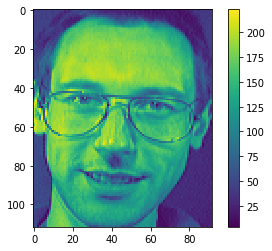

In [39]:
a=glob.glob('*.pgm')
X1 = mpimg.imread(a[0])
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X = X1.flatten()
X = np.zeros(shape=(np.size(a),m*n))
for i,j in zip(a,range(np.size(a))):
    X[j,:]=  mpimg.imread(i).flatten()

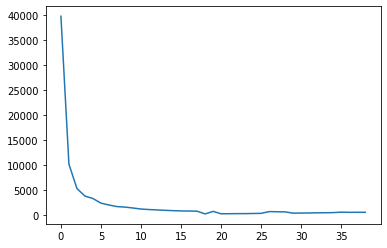

In [40]:
#covariance matrix
CV = np.cov(X)
[eig,U] = np.linalg.eig(CV)#write code here
plt.figure()
plt.plot(eig) 

mse= 475.56913702926664


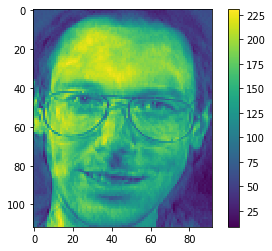

In [43]:
A = U.T#write code here
Y = A.dot(X)#write code here
Yt = Y[:20, :]#write code here #reduced;Choose principal component
Ut = A.T[:, :20]#write code here
Xr = Ut.dot(Yt)#write code here
mse = np.mean((X-Xr)**2)
print("mse=",mse)
X1r = np.reshape(Xr[0,:],[m,n])
plt.imshow(X1r)
plt.colorbar()

## <font color='red'> 3. Implement PCA for remote sensing image.<font>
    Methodology: set of remotely sensed images (Cuprite hyperspectral data having 188 bands) are to be used to generate basis matrix based on PCA, and the matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

(188, 47750)


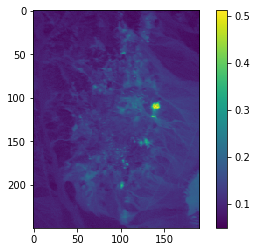

In [44]:
X = sio.loadmat('cuprite.mat')
X= X['x']
print(X.shape)
X1 = np.reshape(X,[188,191,250])
plt.figure()
plt.imshow(X1[1,:,:].T)
plt.colorbar()

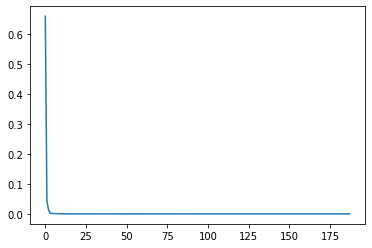

In [45]:
#covariance matrix
CV = np.cov(X)
[eig,U] = np.linalg.eig(CV)
plt.figure()
plt.plot(eig) 

mse= 0.0001678639042695125


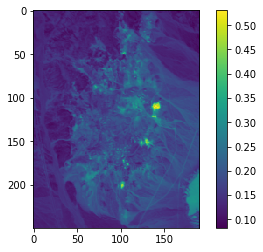

In [46]:
A = U.T
Y = A.dot(X)
Yt = Y[:5, :]
Ut = A.T[:, :5]
Xr = Ut.dot(Yt)
# write code here
mse = np.mean((X-Xr)**2)
print("mse=",mse)
X1r = np.reshape(Xr[0,:],[191,250])
plt.imshow(X1r.T)
plt.colorbar()